In [24]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd
from astroquery.gaia import Gaia

In [25]:
v_df = pd.read_csv('pioneer11_ephemeris_3mon.txt', skiprows = 35, skipfooter=395-344, engine='python') # df of info about pioneer's position
s_df = pd.DataFrame(columns = ['source_id', 'g_abs', 'bp_rp', 'parallax', 'dist']) # df of info about stars

print(v_df)

                   date na1 na2         ra       dec  Unnamed: 5
0     1973-Apr-07 00:00          290.69755 -34.80406         NaN
1     1973-Jul-07 00:00          270.83175 -31.57071         NaN
2     1973-Oct-07 00:00          287.63950 -25.59463         NaN
3     1974-Jan-07 00:00          319.57110 -17.69146         NaN
4     1974-Apr-07 00:00          345.57029  -7.97461         NaN
..                  ...  ..  ..        ...       ...         ...
302   2048-Oct-07 00:00          286.29115  -9.01548         NaN
303   2049-Jan-07 00:00          286.65574  -9.05813         NaN
304   2049-Apr-07 00:00          287.00522  -8.94247         NaN
305   2049-Jul-07 00:00          286.68725  -8.90207         NaN
306   2049-Oct-07 00:00          286.36332  -9.01839         NaN

[307 rows x 6 columns]


In [26]:
for i in range(len(v_df.index)):
    #query to cone search around given pioneer's position
    query = """SELECT source_id, phot_g_mean_mag+5*log10(ABS(parallax)/1000)+5 AS g_abs, bp_rp, parallax, abs(1000/parallax) AS dist
    FROM gaiaedr3.gaia_source
    WHERE 1=CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', """ + str(v_df['ra'][i]) + """,""" + str(v_df['dec'][i]) + """, 0.035603))
    """
    
    results = Gaia.launch_job_async(query).get_results() #results from gaia query
    results = results.to_pandas().dropna() #convert to pandas

    s_df = pd.concat([s_df, results], ignore_index = True)
    
s_df = s_df.drop_duplicates(subset=['source_id']) #only keep unique rows
print(s_df)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [5]:
s_df.to_csv('pioneer11_stars_3mon.csv') #save stars
s_df1 = s_df[s_df['dist'] <= 100]
s_df1.to_csv('pioneer11_stars_within100.csv')
print(s_df1)

                  source_id      g_abs     bp_rp   parallax       dist
539     4043839394369175680  15.848414  2.082985 -17.431217  57.368340
1988    4043839909673029760  15.123722  1.459566 -15.609090  64.065235
2996    3867106197321131136  11.725638  3.044620  11.149582  89.689463
4431    4364446848806515968   4.526065  0.787960  10.534881  94.922758
5980    4168930729081238784  16.252480  1.799665 -11.363348  88.002233
...                     ...        ...       ...        ...        ...
324355  4204396640593975424  15.040187  1.869616 -10.234479  97.708935
327234  4204208525329631232   3.027165  0.583726  10.477306  95.444383
329322  4202905466591421312  15.534077  0.907177  11.763002  85.012314
336101  4202892650407482368  15.475945  1.916252  10.712286  93.350754
341814  4204208525329631232   3.027165  0.583726  10.477306  95.444383

[87 rows x 5 columns]


<ipython-input-6-d8b284c63cb8>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("hot"))
  color_map.set_bad(color='white') #set color as white for masked values


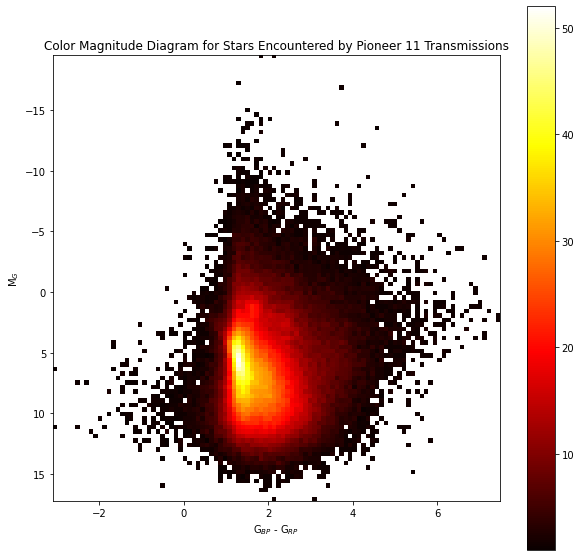

In [6]:
#build hr diagram
histogram, xedges, yedges = np.histogram2d(
   s_df['bp_rp'], s_df['g_abs'], bins=100)

histogram = np.ma.masked_where(histogram == 0.0, histogram) #map zero values
histogram = histogram.T #list bins with common y range

color_map = plt.cm.get_cmap("hot") #set colors for diagram
color_map.set_bad(color='white') #set color as white for masked values

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]] #bounding box in data

#plotting

plt.figure(figsize=(10, 10))

#plt.savefig('gaia_100_parsecs.png')
plt.imshow(np.sqrt(histogram), origin='lower', cmap=color_map,
    extent=extent, aspect=(extent[1]-extent[0])/(extent[3]-extent[2])
    )

plt.colorbar()
plt.title("Color Magnitude Diagram for Stars Encountered by Pioneer 11 Transmissions")
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()
plt.savefig('pioneer11_stars_hr.png')

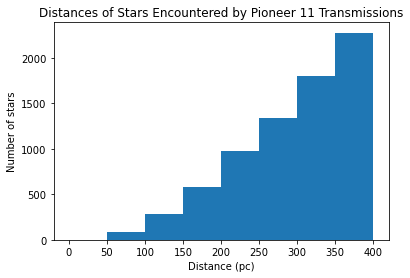

In [12]:
s_df = pd.read_csv('pioneer11_stars_3mon.csv') #get csv

plt.hist(abs(1000/s_df['parallax']), bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]) #plot parallax (mas) converted to distance (pc) in histogram

plt.title("Distances of Stars Encountered by Pioneer 11 Transmissions") #labels
plt.xlabel("Distance (pc)")
plt.ylabel("Number of stars")

plt.savefig("pioneer11_dist_hist_3mon.png")
plt.show()

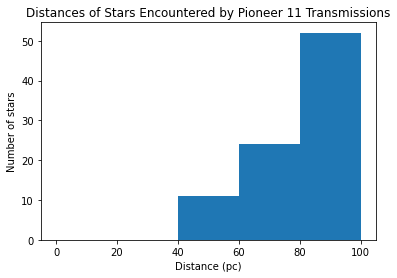

In [17]:
s_df = pd.read_csv('pioneer11_stars_3mon.csv') #get csv

plt.hist(abs(1000/s_df['parallax']), bins = [0, 20, 40, 60, 80, 100]) #plot parallax (mas) converted to distance (pc) in histogram

plt.title("Distances of Stars Encountered by Pioneer 11 Transmissions") #labels
plt.xlabel("Distance (pc)")
plt.ylabel("Number of stars")

plt.savefig("pioneer11_dist_hist_within100.png")
plt.show()

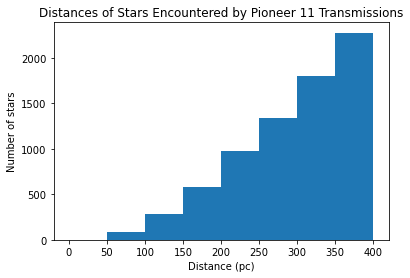

In [14]:
s_df = pd.read_csv('pioneer11_stars_3mon.csv') #get csv

plt.hist(abs(1000/s_df['parallax']), bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]) #plot parallax (mas) converted to distance (pc) in histogram

plt.title("Distances of Stars Encountered by Pioneer 11 Transmissions") #labels
plt.xlabel("Distance (pc)")
plt.ylabel("Number of stars")

plt.savefig("pioneer11_dist_hist_3mon.png")
plt.show()